In [62]:
import pandas as pd

In [63]:
titanic = pd.read_csv('data/train.csv')

In [64]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [65]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###### What is data definition?

|Variable|Definition|Key|Type
|--|--|--|
|survival|Survival|0 = No, 1 = Yes|Categorical
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|Categorical
|sex|Sex|-|Categorical	
|Age|Age in years|-|Continuous
|sibsp|# of siblings / spouses aboard the Titanic|-|Continuous	
|parch|# of parents / children aboard the Titanic|-|Continuous	
|ticket|Ticket number|-|	
|fare|Passenger fare|-|Continuous	
|cabin|Cabin number|-|	
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|Categorical

###### Feature selection

In [66]:
X = titanic[['Pclass','Sex','SibSp','Parch','Fare','Embarked']]
y = titanic['Survived']

###### Train/Test data split

In [67]:
#Since test.csv lacks the survivor data, train.csv will be used for both training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

###### Data cleansing

In [68]:
titanic_train = X_train.join(y_train)
titanic_train.dropna(inplace=True)

In [69]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666 entries, 298 to 102
Data columns (total 7 columns):
Pclass      666 non-null int64
Sex         666 non-null object
SibSp       666 non-null int64
Parch       666 non-null int64
Fare        666 non-null float64
Embarked    666 non-null object
Survived    666 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 41.6+ KB


In [70]:
titanic_train.describe()

,Pclass,SibSp,Parch,Fare,Survived
count,666.000000,666.000000,666.000000,666.000000,666.000000
mean,2.337838,0.555556,0.373874,32.035791,0.376877
std,0.821686,1.186671,0.796520,51.614772,0.484968
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,7.925000,0.000000
50%,3.000000,0.000000,0.000000,14.254150,0.000000
75%,3.000000,1.000000,0.000000,30.392700,1.000000
max,3.000000,8.000000,6.000000,512.329200,1.000000


In [71]:
import matplotlib.pyplot as plt

{'boxes': [<matplotlib.lines.Line2D at 0x1132c6d68>],
 'caps': [<matplotlib.lines.Line2D at 0x1132d07b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1132d7470>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1132d7048>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1132c6eb8>,
  <matplotlib.lines.Line2D at 0x1132d0390>]}

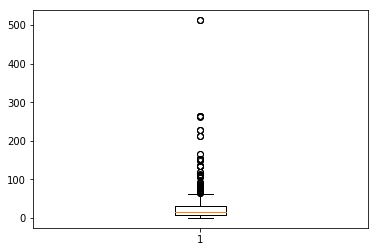

In [72]:
plt.boxplot(titanic_train.Fare)

In [73]:
titanic_train.Fare.quantile(0.99)

262.59375

In [74]:
#Drop 1% outliers
titanic_train = titanic_train[titanic_train.Fare < 263]

In [75]:
X_train = titanic_train[['Pclass','Sex','SibSp','Parch','Fare','Embarked']]
y_train = titanic_train['Survived']

In [76]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659 entries, 298 to 102
Data columns (total 6 columns):
Pclass      659 non-null int64
Sex         659 non-null object
SibSp       659 non-null int64
Parch       659 non-null int64
Fare        659 non-null float64
Embarked    659 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 36.0+ KB


###### Feature engineering

In [77]:
X_train.Sex.head()

298      male
884      male
247    female
478      male
305      male
Name: Sex, dtype: object

In [78]:
X_train.Sex = X_train.Sex.map({'female':1, 'male':0})

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [79]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
298,1,0,0,0,30.5000,S
884,3,0,0,0,7.0500,S
247,2,1,0,2,14.5000,S
478,3,0,0,0,7.5208,S
305,1,0,1,2,151.5500,S


In [80]:
embarked = pd.get_dummies(X_train.Embarked, prefix='Embarked',drop_first=True)

In [81]:
X_train = X_train.join(embarked);
X_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Embarked_Q,Embarked_S
298,1,0,0,0,30.5000,S,0,1
884,3,0,0,0,7.0500,S,0,1
247,2,1,0,2,14.5000,S,0,1
478,3,0,0,0,7.5208,S,0,1
305,1,0,1,2,151.5500,S,0,1


In [82]:
import seaborn as sns

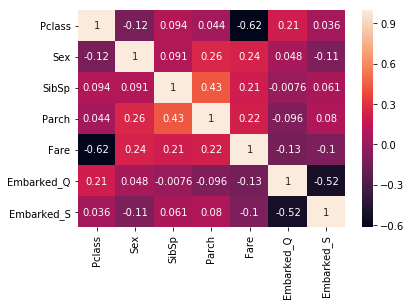

In [83]:
sns.heatmap(X_train.corr(), annot=True)

In [23]:
#Since there is correlation between Parch and SibSp lets combine it into one Family variablea

In [84]:
X_train['Family'] = X_train['SibSp'] + X_train['Parch']

###### Model

In [85]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [86]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659 entries, 298 to 102
Data columns (total 9 columns):
Pclass        659 non-null int64
Sex           659 non-null int64
SibSp         659 non-null int64
Parch         659 non-null int64
Fare          659 non-null float64
Embarked      659 non-null object
Embarked_Q    659 non-null uint8
Embarked_S    659 non-null uint8
Family        659 non-null int64
dtypes: float64(1), int64(5), object(1), uint8(2)
memory usage: 62.5+ KB


In [87]:
X_train_filtered = X_train[['Pclass','Sex','Family','Fare', 'Embarked_S','Embarked_Q']]

In [88]:
columns = X_train_filtered.columns
X_train_filtered_std = ss.fit_transform(X_train_filtered[[name for name in columns]])

In [89]:
pd.DataFrame(X_train_filtered_std).head()

,0,1,2,3,4,5
0,-1.661614,-0.717595,-0.542863,0.056895,0.594292,-0.310654
1,0.796306,-0.717595,-0.542863,-0.593109,0.594292,-0.310654
2,-0.432654,1.393544,0.653614,-0.386605,0.594292,-0.310654
3,0.796306,-0.717595,-0.542863,-0.580059,0.594292,-0.310654
4,-1.661614,-0.717595,1.251852,3.412245,0.594292,-0.310654


###### Data fitting

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
lgr = LogisticRegression()

In [92]:
param_grid = [
    {'C': [C for C in [0.01, 0.1, 1, 10] ]  } ]

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
grid = GridSearchCV(lgr, param_grid, cv = 5)

In [95]:
grid.fit(pd.DataFrame(X_train_filtered_std), y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.01, 0.1, 1, 10]}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [96]:
grid.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

###### Score and Interpret your results

In [111]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 709 to 424
Data columns (total 9 columns):
Pclass        223 non-null int64
Sex           223 non-null int64
SibSp         223 non-null int64
Parch         223 non-null int64
Fare          223 non-null float64
Embarked      223 non-null object
Embarked_Q    223 non-null uint8
Embarked_S    223 non-null uint8
Family        223 non-null int64
dtypes: float64(1), int64(5), object(1), uint8(2)
memory usage: 24.4+ KB


In [114]:
#Since there are no nulls in the test set, skipping the drop of null rows

In [99]:
X_test.Sex = X_test.Sex.map({'female':1, 'male':0})

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [100]:
embarked_test = pd.get_dummies(X_test.Embarked, prefix='Embarked',drop_first=True)

In [101]:
X_test = X_test.join(embarked_test);

In [102]:
X_test['Family'] = X_test['SibSp'] + X_test['Parch']

In [103]:
X_test_filtered = X_test[['Pclass','Sex','Family','Fare', 'Embarked_S','Embarked_Q']]

In [104]:
X_test_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 709 to 424
Data columns (total 6 columns):
Pclass        223 non-null int64
Sex           223 non-null int64
Family        223 non-null int64
Fare          223 non-null float64
Embarked_S    223 non-null uint8
Embarked_Q    223 non-null uint8
dtypes: float64(1), int64(3), uint8(2)
memory usage: 19.1 KB


In [105]:
X_test_filtered_std = ss.transform(X_test_filtered[[name for name in columns]])

In [106]:
grid.score(X_test_filtered_std, y_test)

0.7713004484304933

In [128]:
y_test.value_counts(normalize=True)

0    0.600897
1    0.399103
Name: Survived, dtype: float64

*Since baseline accuracy is 60%, the model score of 77% is significantly better*

In [107]:
from sklearn.metrics import classification_report, confusion_matrix

In [108]:
predictions = grid.predict(X_test_filtered_std)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.82      0.80      0.81       134
          1       0.71      0.73      0.72        89

avg / total       0.77      0.77      0.77       223



*From above, the model has more predictive power in figuring out non survivors*

In [109]:
confusion_matrix(y_test, predictions)

array([[107,  27],
       [ 24,  65]])

In [110]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc
import numpy as np

Text(0,0.5,'Recall')

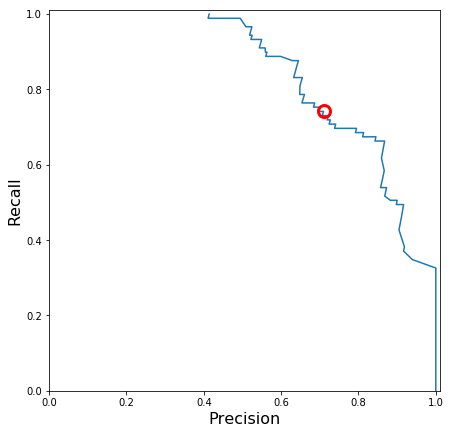

In [50]:
y_scores_lr = grid.fit(X_train_filtered_std, y_train).decision_function(X_test_filtered_std)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure(figsize = (7, 7))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)

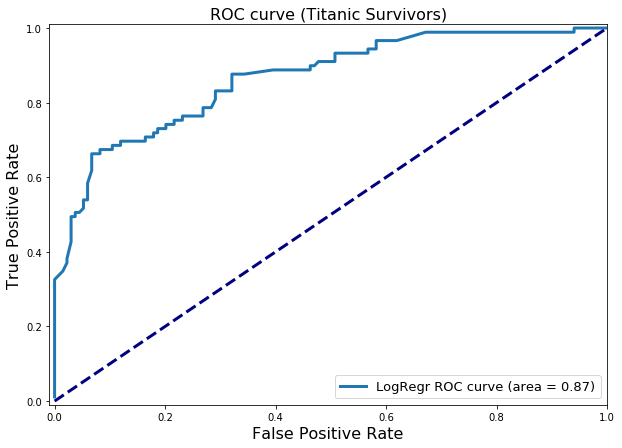

In [51]:
y_score_lr = lgr.fit(X_train_filtered_std, y_train).decision_function(X_test_filtered_std)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize = (10, 7))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (Titanic Survivors)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

# SGD Classifier

In [52]:
from sklearn.linear_model import SGDClassifier

In [53]:
gd_clf = SGDClassifier(max_iter = 1000)
gd_clf.fit(X_train_filtered, y_train)
pred = gd_clf.predict(X_test_filtered)
print(classification_report(pred, y_test))

             precision    recall  f1-score   support

          0       0.90      0.77      0.83       158
          1       0.58      0.80      0.68        65

avg / total       0.81      0.78      0.78       223



*From above the model has poorer precision for predicting survivors.*

# K Nearest Neighbor

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier(n_neighbors=5)

In [56]:
knn.fit(X_train_filtered, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [57]:
pred = knn.predict(X_test_filtered)

In [58]:
print(classification_report(pred, y_test))

             precision    recall  f1-score   support

          0       0.84      0.82      0.83       138
          1       0.72      0.75      0.74        85

avg / total       0.80      0.79      0.79       223



*From above the model has similar predictive power as Logistic Regression.*

*For both of SGD and KNN, we can optimize more by using GridSearch as was done for LogisticRegression.*